In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the kidney disease dataset from a CSV file
df = pd.read_csv("/content/new_model.csv")
# Display the first five rows of the dataset to preview the data structure
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [5]:
#Check for missing values
df.isnull().sum()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0
Bu,0
Sc,0
Sod,0
Pot,0
Hemo,0


In [7]:
#Distribution of the target variable
df['Class'].value_counts()

,count
Class,
1,250
0,150


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

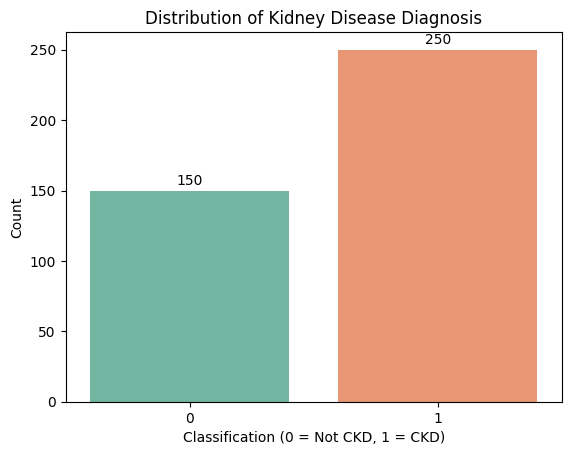

In [11]:
count = df['Class'].value_counts()
# Create a bar plot using Seaborn with a custom color palette
ax = sns.barplot(x=count.index, y=count.values, palette='Set2')
# Add labels above each bar showing the count
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)
# Add plot title and axis labels
plt.title("Distribution of Kidney Disease Diagnosis")
plt.xlabel("Classification (0 = Not CKD, 1 = CKD)")
plt.ylabel("Count")
# Display the plot
plt.show()

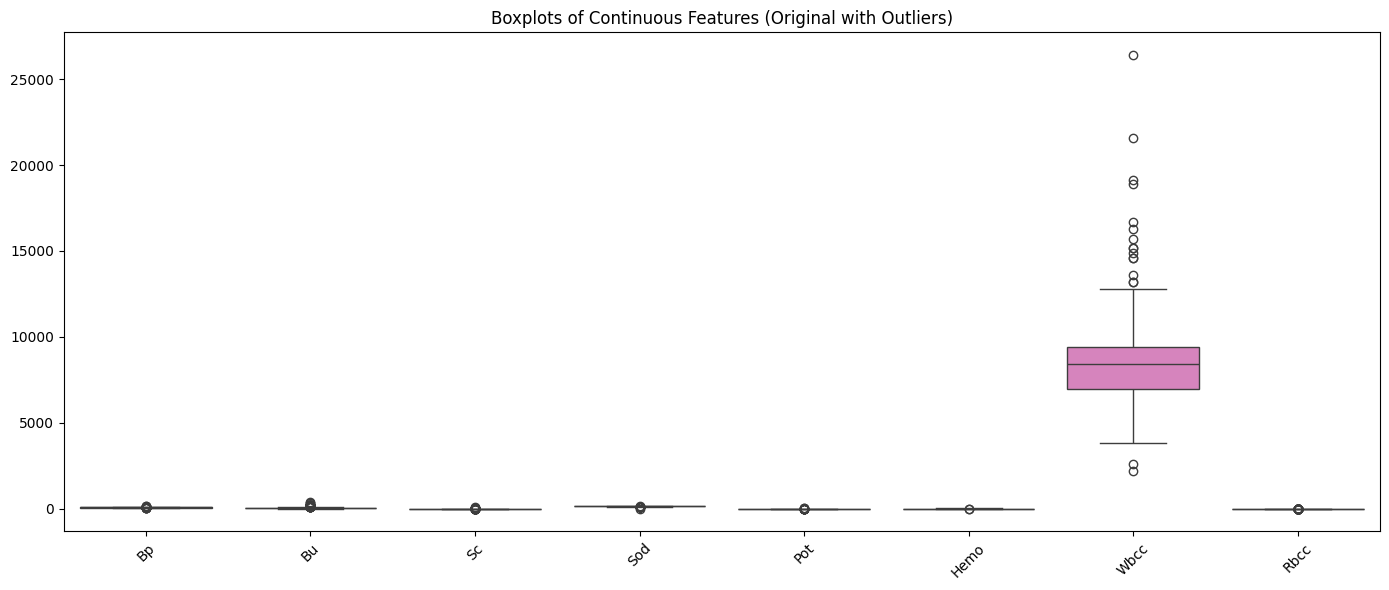

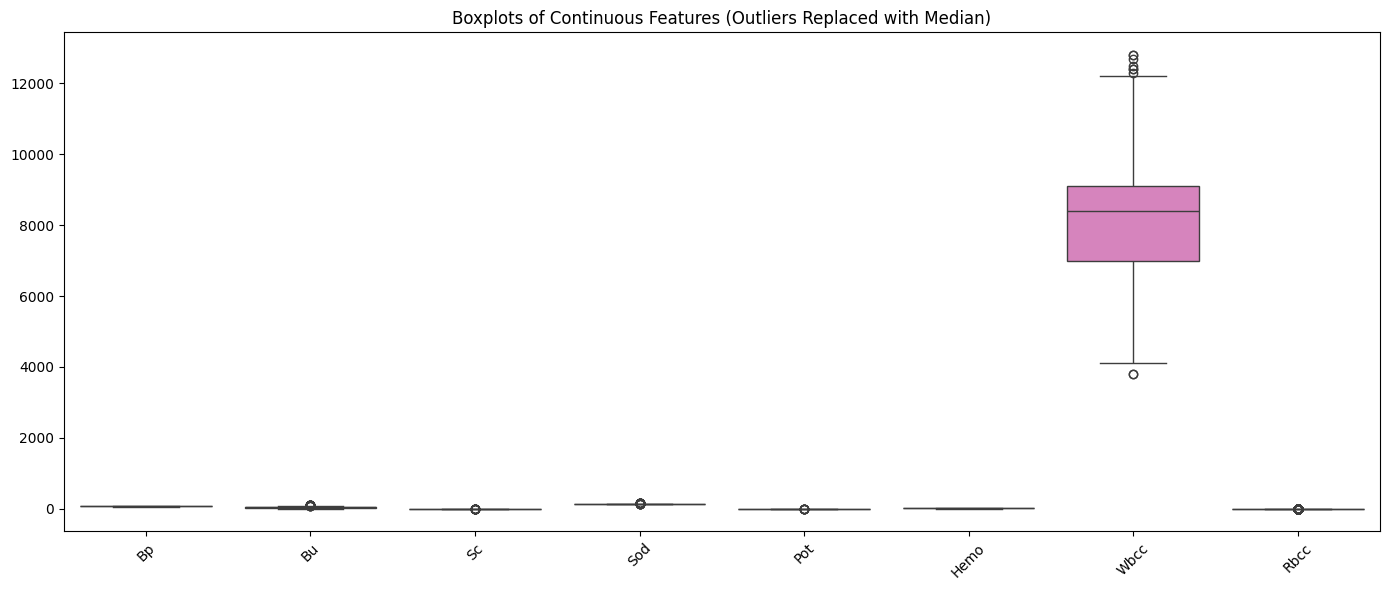

In [13]:
#Check the dataset for outliers
# Create a copy to modify
continous_cols = ["Bp", "Bu", "Sc", "Sod", "Pot", "Hemo", "Wbcc", "Rbcc"]
df_no_outliers = df.copy()
# Replace outliers with median using IQR method
for col in continous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    df_no_outliers[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])
# Plot boxplots (Original Data)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[continous_cols])
plt.title('Boxplots of Continuous Features (Original with Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot boxplots (After Replacing Outliers)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_no_outliers[continous_cols])
plt.title('Boxplots of Continuous Features (Outliers Replaced with Median)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

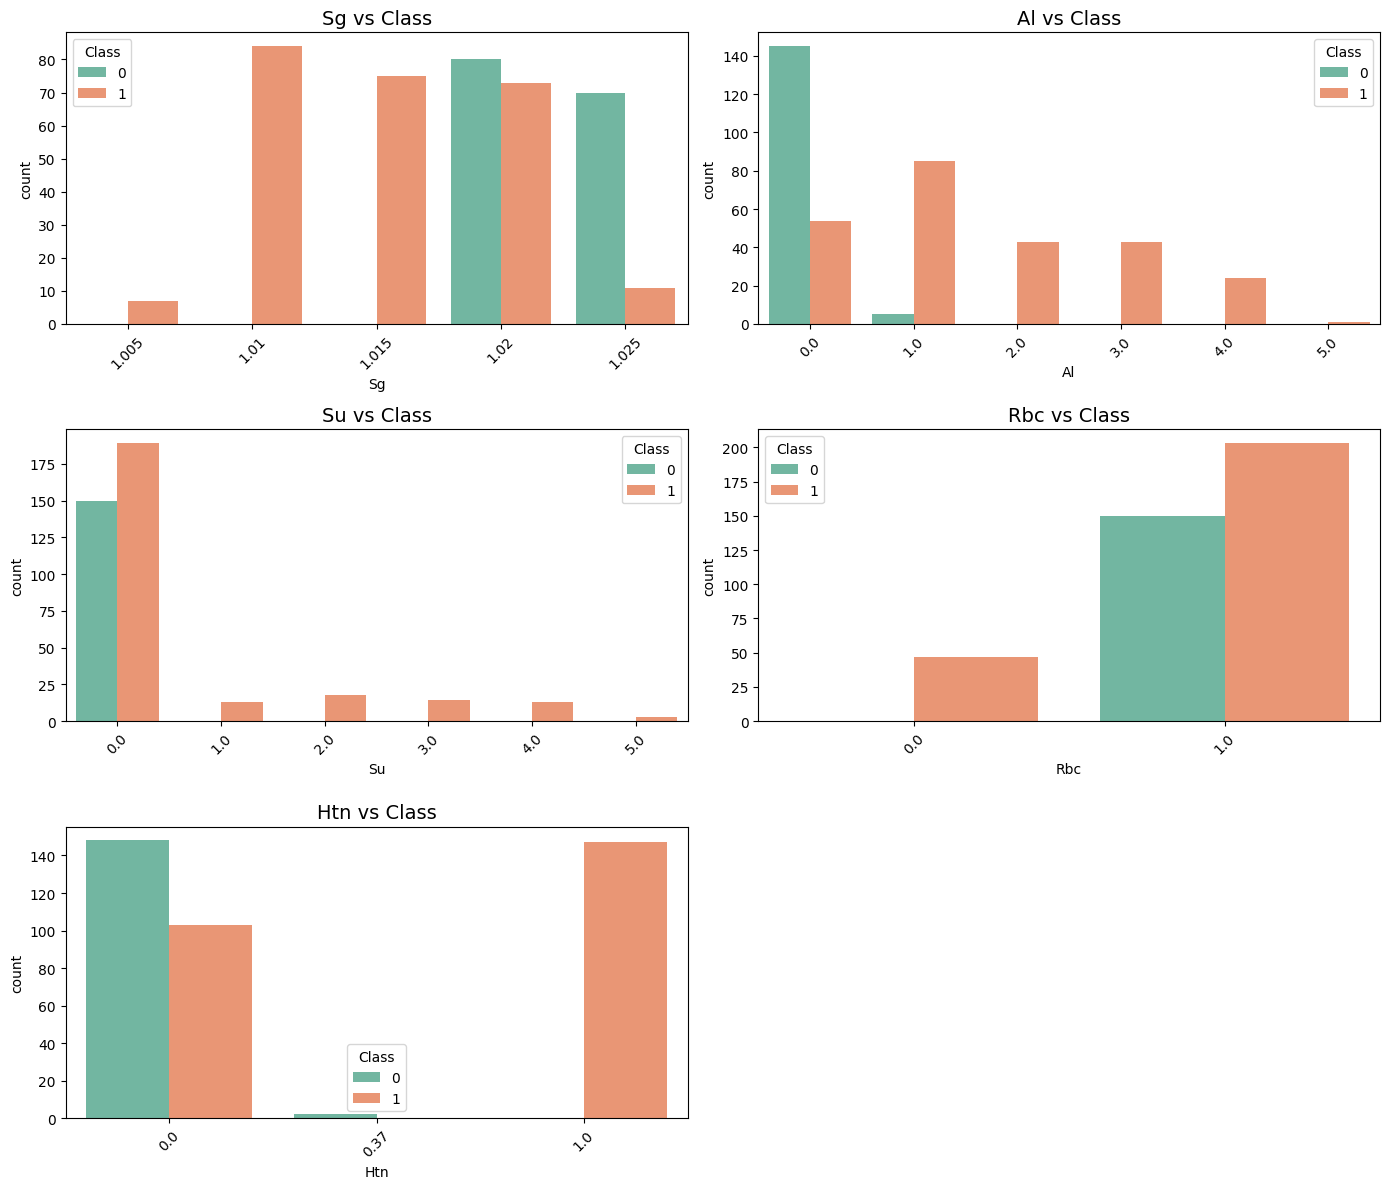

In [17]:
# Define categorical and target columns
categorical_cols = ["Sg", "Al", "Su", "Rbc", "Htn"]
target_col = 'Class'
# Subplot grid (2 per row for readability)
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # ceiling division
# Create subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axs = axs.flatten()  # flatten for easy iteration
# Loop through categorical columns
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_no_outliers, x=col, hue=target_col, ax=axs[i], palette="Set2")
    axs[i].set_title(f"{col} vs {target_col}", fontsize=14)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title=target_col)
# Remove unused axes (if any)
for j in range(len(categorical_cols), len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

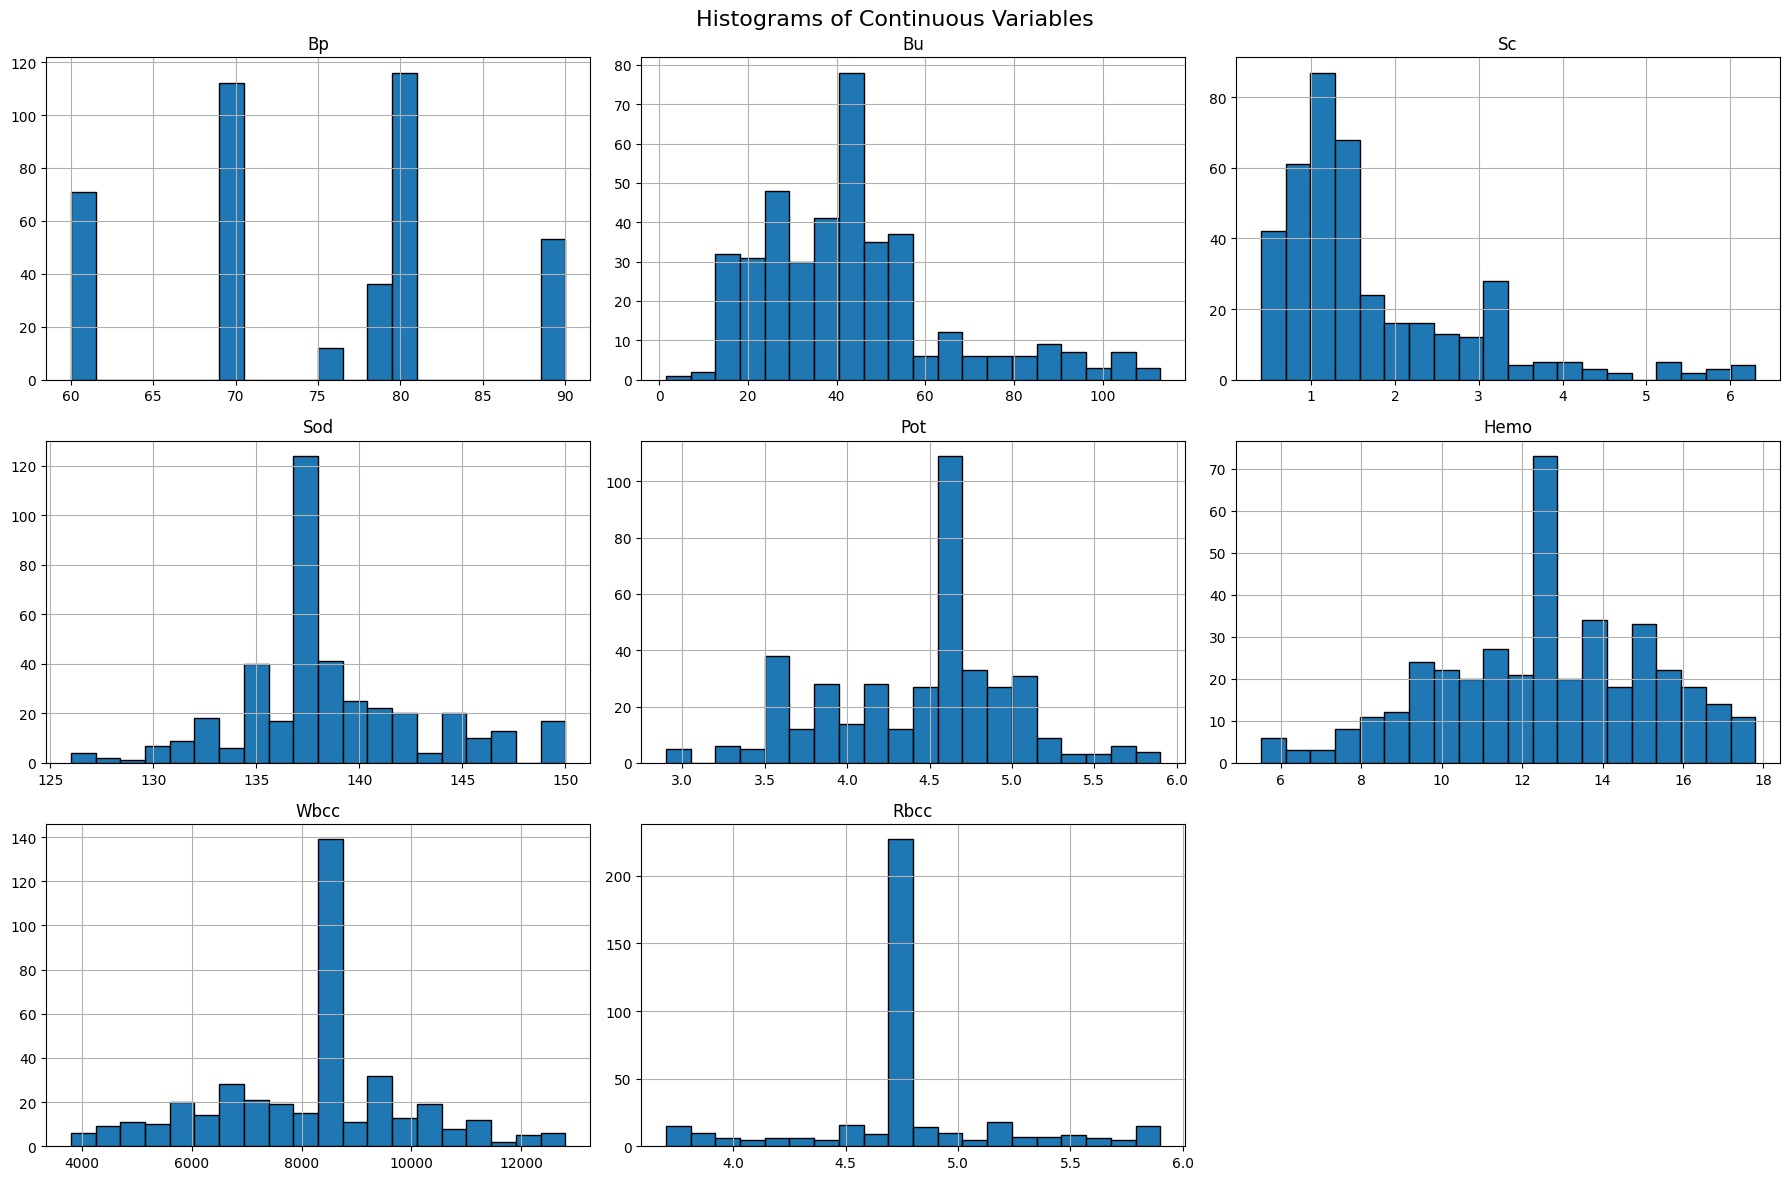

In [18]:
continuous_cols = [col for col in df_no_outliers.columns if col not in categorical_cols + [target_col]]
# Plot histograms for continuous variables
df_no_outliers[continuous_cols].hist(figsize=(18, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
df_clean = df_no_outliers.copy()
df_clean.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,78.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,137.53,4.63,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [20]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

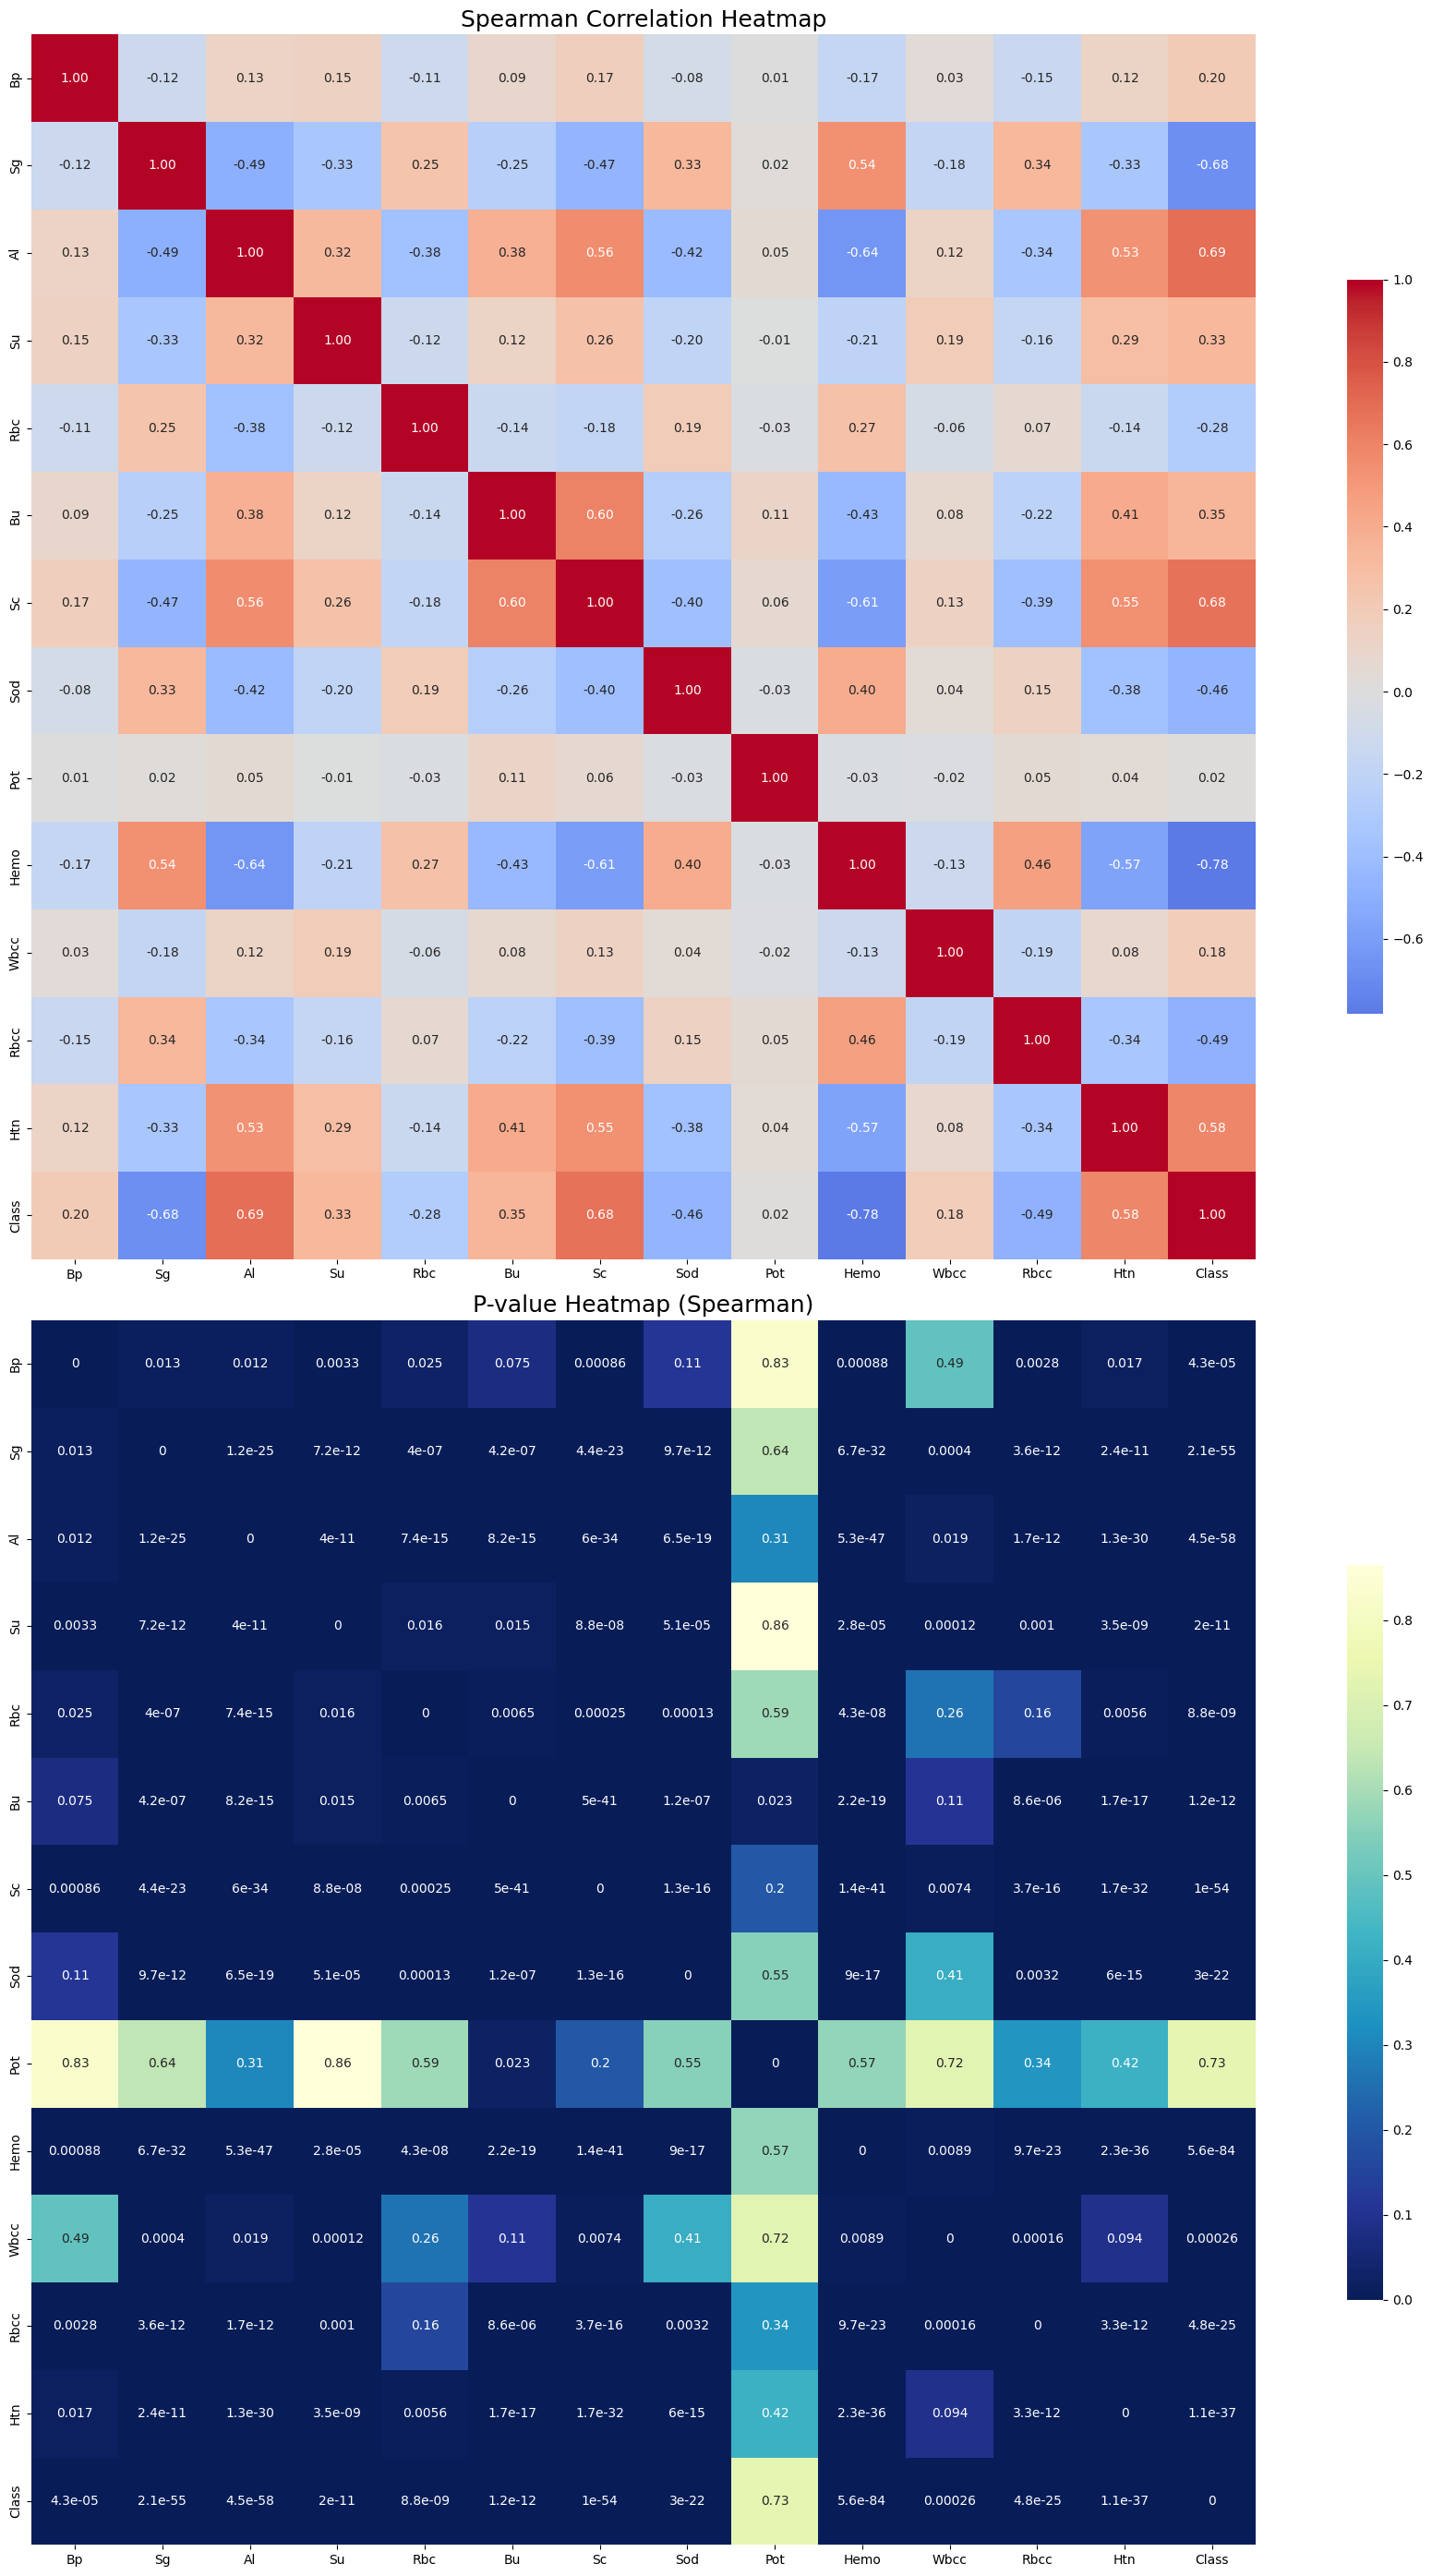

In [21]:
# Compute Spearman correlation and p-values matrix
corr, pval = spearmanr(df_clean)
# Convert to DataFrames for easier plotting
cols = df_clean.columns
corr_df = pd.DataFrame(corr, index=cols, columns=cols)
pval_df = pd.DataFrame(pval, index=cols, columns=cols)
# Create vertically stacked heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 28))  # 2 rows, 1 column
# Spearman Correlation Heatmap
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": 0.6}, ax=ax1)
ax1.set_title('Spearman Correlation Heatmap', fontsize=18)
# P-value Heatmap
sns.heatmap(pval_df, annot=True, fmt=".2g", cmap='YlGnBu_r',
            square=True, cbar_kws={"shrink": 0.6}, ax=ax2)
ax2.set_title('P-value Heatmap (Spearman)', fontsize=18)
# Final layout adjustment
plt.tight_layout()
plt.show()

In [22]:
corr_df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.124054,0.125941,0.146535,-0.111735,0.089026,0.165961,-0.079059,0.010816,-0.165686,0.034635,-0.148924,0.119620,0.203042
Sg,-0.124054,1.000000,-0.490758,-0.333880,0.250124,-0.249754,-0.467241,0.331892,0.023684,0.541861,-0.176188,0.338398,-0.325943,-0.679142
Al,0.125941,-0.490758,1.000000,0.322287,-0.375712,0.375105,0.556818,-0.424354,0.051276,-0.637482,0.117642,-0.343180,0.531959,0.691025
Su,0.146535,-0.333880,0.322287,1.000000,-0.120738,0.121880,0.263597,-0.201205,-0.008529,-0.207710,0.191601,-0.163902,0.289901,0.327172
Rbc,-0.111735,0.250124,-0.375712,-0.120738,1.000000,-0.135825,-0.182064,0.190196,-0.027210,0.269696,-0.056264,0.070816,-0.138259,-0.282642
Bu,0.089026,-0.249754,0.375105,0.121880,-0.135825,1.000000,0.603354,-0.260775,0.113965,-0.429468,0.080282,-0.220447,0.408135,0.345597
Sc,0.165961,-0.467241,0.556818,0.263597,-0.182064,0.603354,1.000000,-0.397753,0.064123,-0.606640,0.133720,-0.392154,0.546365,0.675932
Sod,-0.079059,0.331892,-0.424354,-0.201205,0.190196,-0.260775,-0.397753,1.000000,-0.029783,0.399649,0.041702,0.146882,-0.376881,-0.459183
Pot,0.010816,0.023684,0.051276,-0.008529,-0.027210,0.113965,0.064123,-0.029783,1.000000,-0.028572,-0.017711,0.047786,0.040605,0.017106
Hemo,-0.165686,0.541861,-0.637482,-0.207710,0.269696,-0.429468,-0.606640,0.399649,-0.028572,1.000000,-0.130711,0.463892,-0.573576,-0.782687


In [23]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Suppose your dataset is in a DataFrame df
# and the columns are exactly as listed:
cols = ["Bp","Sg","Al","Su","Rbc","Bu","Sc","Sod","Pot","Hemo","Wbcc","Rbcc","Htn"]
# Only predictors (exclude target "Class")
X = df_clean[cols]
# Add a constant term for statsmodels
X_const = add_constant(X)
# Compute VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]
print(vif)

   Variable           VIF
0     const  53931.793118
1        Bp      1.083389
2        Sg      1.573118
3        Al      1.833056
4        Su      1.189575
5       Rbc      1.212516
6        Bu      1.639942
7        Sc      1.800921
8       Sod      1.417562
9       Pot      1.023267
10     Hemo      2.221656
11     Wbcc      1.083766
12     Rbcc      1.383143
13      Htn      1.806540


**OBSERVATION:** Even though the correlation matrix showed some moderately strong correlations (e.g., Al–Hemo, Sc–Bu, Hemo–Htn), the VIF values confirm that these correlations aren’t severe enough to cause multicollinearity issues in regression models.

In [25]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten

In [35]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
# Split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (280, 13) (280,)
Test size: (120, 13) (120,)


**FEATURE SELECTION USING A TREE-BASED MODEL APPROACH**

**OBSERVATION:** We selected a tree-based approach for feature selection, as our predictor features contains a combination of categorical and continuous features.

In [49]:
import xgboost as xgb
from xgboost import plot_importance

In [38]:
xgb = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=4,random_state=42,use_label_encoder=False,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
xgb_pred = xgb.predict(X_test)
#Evaluate the model accuracy
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.99      1.00      0.99        75

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Feature Importance:
   Feature  Importance
7    Hemo       103.0
4      Sc        68.0
1      Sg        52.0
6     Pot        49.0
3      Bu        35.0
2      Al        31.0
9     Htn        26.0
5     Sod        20.0
0      Bp        12.0
8    Rbcc         2.0


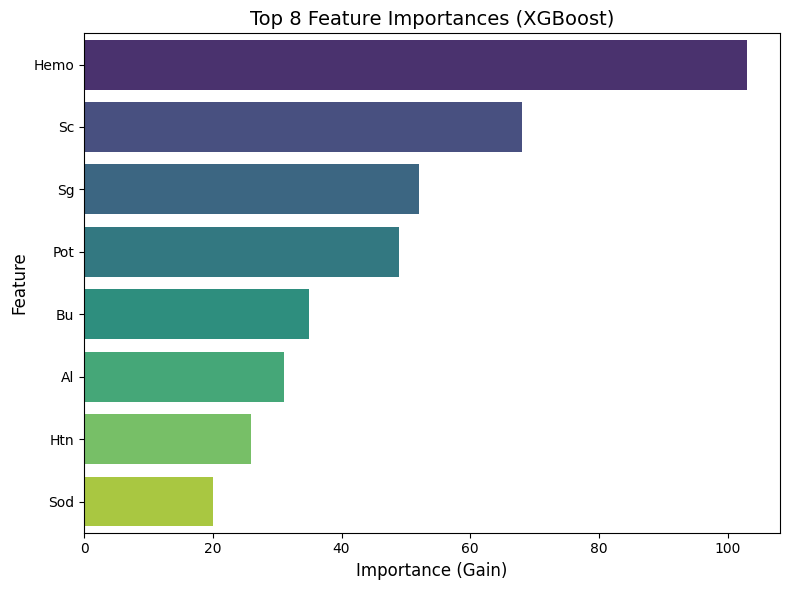

In [42]:
# 1. Get feature importance values
importance = xgb.get_booster().get_score(importance_type='weight')  # 'weight', 'gain', 'cover'
# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", importance_df)
# Select top 8
top8 = importance_df.head(8)
# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=top8, x="Importance", y="Feature", palette="viridis")
plt.title("Top 8 Feature Importances (XGBoost)", fontsize=14)
plt.xlabel("Importance (Gain)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

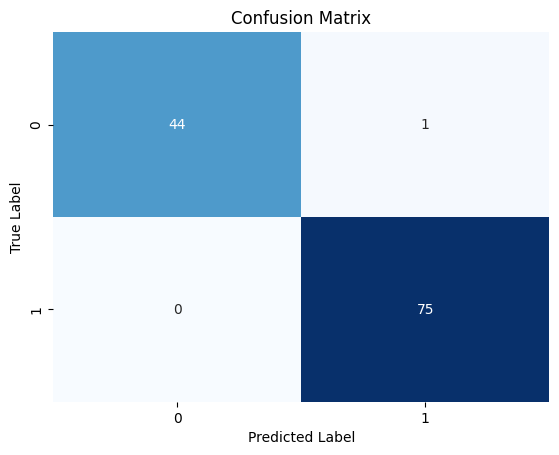

In [43]:
#Plot of the confusion matrix
cm = confusion_matrix(y_test, xgb_pred, labels=xgb.classes_)
disp = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
disp.set_title("Confusion Matrix")
disp.set_xlabel("Predicted Label")
disp.set_ylabel("True Label")
plt.show()

**RETRAINING THE MODEL WILL THE TOP CONTRIBUTING FEATURES**

In [44]:
selected = ["Hemo", "Sc", "Sg", "Pot", "Bu", "Al", "Htn", "Sod"]
X = df_clean[selected]
y = df_clean['Class']
# Split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (280, 8) (280,)
Test size: (120, 8) (120,)


In [50]:
xgb_retrain = xgb.XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=4,random_state=42,use_label_encoder=False,eval_metric='logloss')
xgb_retrain.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
xgb_pred = xgb_retrain.predict(X_test)
#Evaluate the model accuracy
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.99      0.99      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



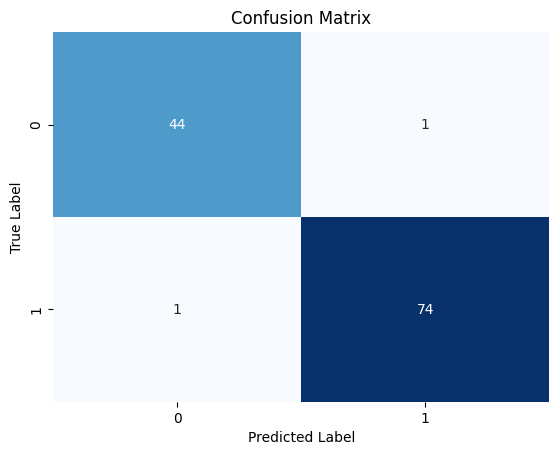

In [53]:
#Plot of the confusion matrix
cm = confusion_matrix(y_test, xgb_pred, labels=xgb_retrain.classes_)
disp = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
disp.set_title("Confusion Matrix")
disp.set_xlabel("Predicted Label")
disp.set_ylabel("True Label")
plt.show()

**SAVING THE MODEL**

In [54]:
#Save the model
import pickle
filename = 'xgb_model.sav'
pickle.dump(xgb_retrain, open(filename, 'wb'))